In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms.bipartite.basic import density
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import random
import seaborn as sns

from random import randrange
from datetime import timedelta
from datetime import datetime

In [2]:
listenings = pd.read_csv('preprocessed_data/listenings_with_years_and_users.csv',parse_dates=['timestamp','album_date'])
# no timezones needed
listenings['timestamp'] = listenings['timestamp'].dt.tz_localize(None)
listenings['album_date'] = listenings['album_date'].dt.tz_localize(None)

# we only take a look at songs released in the year 2005 and later (when the dataset begins)
listenings = listenings[listenings['album_date'].apply(lambda x: x.year)>=2005]
listenings = listenings[listenings['album_date'].apply(lambda x: x.year)!=2010]

# we create a unique identifier from artist and track name
listenings['art_tra_name'] = listenings['artname'] + '@' + listenings['traname']

# sort the listenings by time
listenings.sort_values(by='timestamp',inplace=True)
listenings.index=listenings['timestamp']
listenings.head()

,userid,timestamp,artname,traname,album_id,album_date,gender,country,art_tra_name
timestamp,,,,,,,,,
2005-02-14 00:02:10,user_000285,2005-02-14 00:02:10,The Killers,Jenny Was A Friend Of Mine,bc9bd08c-1d1a-4e4e-bd40-8829aa120013,2006-02-24,f,United States,The Killers@Jenny Was A Friend Of Mine
2005-02-14 00:10:09,user_000966,2005-02-14 00:10:09,Michael Jackson,Billie Jean,9774b815-8ffa-4fd2-8eb5-c25539322a77,2013-10-17,NaN,United States,Michael Jackson@Billie Jean
2005-02-14 00:11:37,user_000391,2005-02-14 00:11:37,The Rolling Stones,Brown Sugar,355d957f-cdd6-4902-aa80-f7bf2c4fff38,2009-05-08,f,Germany,The Rolling Stones@Brown Sugar
2005-02-14 00:24:25,user_000304,2005-02-14 00:24:25,The Go! Team,Ladyflash,c76128aa-e003-31e7-8892-f16f2fa87051,2005-10-03,f,United Kingdom,The Go! Team@Ladyflash
2005-02-14 00:27:30,user_000304,2005-02-14 00:27:30,The Go! Team,Feelgood By Numbers,c76128aa-e003-31e7-8892-f16f2fa87051,2005-10-03,f,United Kingdom,The Go! Team@Feelgood By Numbers


In [3]:
top10Songs2005 = list(listenings[listenings['album_date'].apply(lambda x: x.year)==2005].groupby('art_tra_name').count().sort_values('userid',ascending=False)[:10].index)
top10Songs2005

['Death Cab For Cutie@Soul Meets Body',
 'Death Cab For Cutie@I Will Follow You Into The Dark',
 'Bloc Party@Banquet',
 'Arctic Monkeys@I Bet You Look Good On The Dancefloor',
 'Bloc Party@Blue Light',
 'Modest Mouse@Float On',
 'Death Cab For Cutie@Summer Skin',
 'The Fray@How To Save A Life',
 'Bloc Party@This Modern Love',
 'Death Cab For Cutie@Marching Bands Of Manhattan']

In [4]:
aggregatedTop10 = listenings[listenings['art_tra_name'].isin(top10Songs2005)].groupby([pd.Grouper(freq="M"), "art_tra_name"]).count()[['userid']].reset_index()

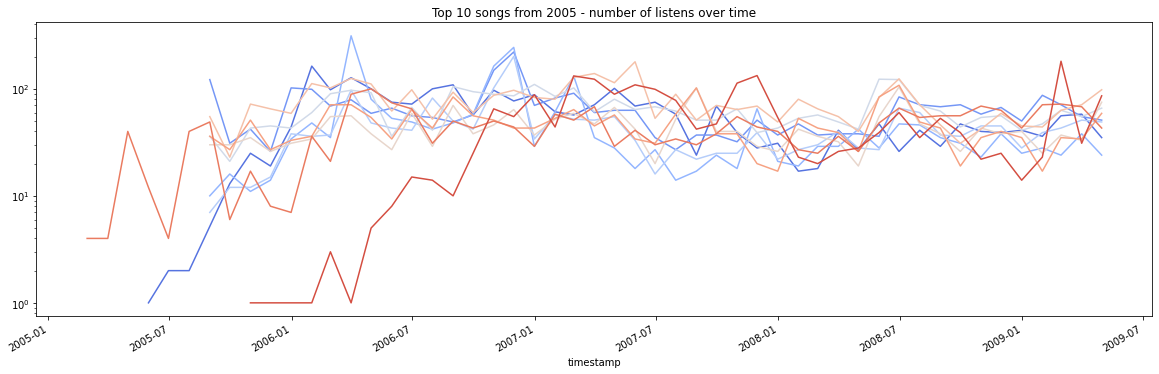

In [5]:
fig, ax= plt.subplots(figsize=(20,6))

colors = sns.color_palette("coolwarm", aggregatedTop10.art_tra_name.nunique())
ax.set_prop_cycle('color', colors)

for idx, gp in aggregatedTop10.groupby('art_tra_name'):
    gp.plot(x='timestamp', y='userid', ax=ax, legend=False)
plt.yscale('log', nonpositive='clip')
plt.title('Top 10 songs from 2005 - number of listens over time')
plt.show()

In [6]:
listenings.rename({'album_date':'release_date'},axis=1,inplace=True)

In [7]:
listenings.head()

,userid,timestamp,artname,traname,album_id,release_date,gender,country,art_tra_name
timestamp,,,,,,,,,
2005-02-14 00:02:10,user_000285,2005-02-14 00:02:10,The Killers,Jenny Was A Friend Of Mine,bc9bd08c-1d1a-4e4e-bd40-8829aa120013,2006-02-24,f,United States,The Killers@Jenny Was A Friend Of Mine
2005-02-14 00:10:09,user_000966,2005-02-14 00:10:09,Michael Jackson,Billie Jean,9774b815-8ffa-4fd2-8eb5-c25539322a77,2013-10-17,NaN,United States,Michael Jackson@Billie Jean
2005-02-14 00:11:37,user_000391,2005-02-14 00:11:37,The Rolling Stones,Brown Sugar,355d957f-cdd6-4902-aa80-f7bf2c4fff38,2009-05-08,f,Germany,The Rolling Stones@Brown Sugar
2005-02-14 00:24:25,user_000304,2005-02-14 00:24:25,The Go! Team,Ladyflash,c76128aa-e003-31e7-8892-f16f2fa87051,2005-10-03,f,United Kingdom,The Go! Team@Ladyflash
2005-02-14 00:27:30,user_000304,2005-02-14 00:27:30,The Go! Team,Feelgood By Numbers,c76128aa-e003-31e7-8892-f16f2fa87051,2005-10-03,f,United Kingdom,The Go! Team@Feelgood By Numbers


We create a custom function evaluating the strength of the forgetting phenomenon in the dataset similar to the custom function for the preferential attachment. For each of the listenings we calculate the random probability of the song being listened to (1/nr_of_songs_that_appeared_so_far) and the probabiliy proportional to the songs age (song_age/total_age_of_all_songs). In the end we compare the sums of the different probability types- the higher the result the stronger the forgetting is in the dataset.

In [8]:
def forgetting_intensity(listenings,attrName='art_tra_name',attrFilter=None):

    songsAppearedSet = set() #  song_name -> song_release_Date
    totalSongAge = 0 
    randomProbList = []
    ageWeightedProbList = []

    listenedTimeBefore = listenings['timestamp'].iloc[0]
    for name,attr,listenedTime, releaseTime in tqdm(zip(listenings['art_tra_name'],listenings[attrName], listenings['timestamp'], listenings['release_date']),total=len(listenings),
                                                     position=0, leave=True):

        songAge = (listenedTime - releaseTime).total_seconds()
        # ignore if song is song age is negative
        if(songAge<0):
            continue

        # time elapsed from the last litening 
        timeElapsed = (listenedTime - listenedTimeBefore).total_seconds()
        listenedTimeBefore = listenedTime

        # all the songs got older
        totalSongAge += timeElapsed*len(songsAppearedSet)
        
        # if this was the first time for a song we add its initial age
        if(name not in songsAppearedSet):
            totalSongAge += songAge
        
        # update set of songs that appeared so far
        songsAppearedSet.add(name)

        # optional filter using datasets user attributes
        if(attrName=='art_tra_name' or attr==attrFilter):
            # completely random probability
            randomProb = 1/len(songsAppearedSet)
            # probability proportional to the song age normalized by the total age of all songs listened to so far
            ageWeightedProb = songAge / totalSongAge

            randomProbList.append(randomProb)
            ageWeightedProbList.append(ageWeightedProb)



    return sum(randomProbList)/sum(ageWeightedProbList)

In [9]:
listenings.head()

,userid,timestamp,artname,traname,album_id,release_date,gender,country,art_tra_name
timestamp,,,,,,,,,
2005-02-14 00:02:10,user_000285,2005-02-14 00:02:10,The Killers,Jenny Was A Friend Of Mine,bc9bd08c-1d1a-4e4e-bd40-8829aa120013,2006-02-24,f,United States,The Killers@Jenny Was A Friend Of Mine
2005-02-14 00:10:09,user_000966,2005-02-14 00:10:09,Michael Jackson,Billie Jean,9774b815-8ffa-4fd2-8eb5-c25539322a77,2013-10-17,NaN,United States,Michael Jackson@Billie Jean
2005-02-14 00:11:37,user_000391,2005-02-14 00:11:37,The Rolling Stones,Brown Sugar,355d957f-cdd6-4902-aa80-f7bf2c4fff38,2009-05-08,f,Germany,The Rolling Stones@Brown Sugar
2005-02-14 00:24:25,user_000304,2005-02-14 00:24:25,The Go! Team,Ladyflash,c76128aa-e003-31e7-8892-f16f2fa87051,2005-10-03,f,United Kingdom,The Go! Team@Ladyflash
2005-02-14 00:27:30,user_000304,2005-02-14 00:27:30,The Go! Team,Feelgood By Numbers,c76128aa-e003-31e7-8892-f16f2fa87051,2005-10-03,f,United Kingdom,The Go! Team@Feelgood By Numbers


In [10]:
# utility funciton generates a randonm date between the specified range
def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

We test the function by generating random data of 1 million listeings of 1000 songs with corresponding listening timestamps and release dates.

In [11]:
random.seed(0)
N_DISTINCT_SONGS = 1000
N_LISTENINGS = 1000000

artTraNameTest = [random.randint(1,N_DISTINCT_SONGS) for x in range(N_LISTENINGS)]

d1 = datetime.strptime('01/01/2005 00:01', '%m/%d/%Y %H:%M')
d2 = datetime.strptime('12/31/2009 23:59', '%m/%d/%Y %H:%M')
listeningTimesTest = sorted([random_date(d1, d2) for x in range(N_LISTENINGS)])

releaseDateTestDict = {}
releaseDatesTest = []

for name,lisTime in zip(artTraNameTest,listeningTimesTest):
    if(name in releaseDateTestDict):
        releaseDatesTest.append(releaseDateTestDict[name])
    else:
        releaseDateTestDict[name] = random_date(d1, lisTime)
        releaseDatesTest.append(releaseDateTestDict[name])

testDf = pd.DataFrame()
testDf['art_tra_name'] = artTraNameTest
testDf['timestamp'] = listeningTimesTest
testDf['release_date'] = releaseDatesTest

testDf.head()

,art_tra_name,timestamp,release_date
0,865,2005-01-01 00:01:17,2005-01-01 00:01:08
1,395,2005-01-01 00:03:46,2005-01-01 00:02:58
2,777,2005-01-01 00:04:38,2005-01-01 00:04:30
3,912,2005-01-01 00:11:10,2005-01-01 00:02:12
4,431,2005-01-01 00:11:16,2005-01-01 00:01:31


In [12]:
# as expected - with random data where listenings are not related to the songs age we get a value near 1
forgetting_intensity(testDf)

100%|██████████| 1000000/1000000 [00:26<00:00, 38424.31it/s]


1.002491175190483

In [13]:
# with the actual data we see there is the forgetting phenomenon
forgetting_intensity(listenings)

100%|██████████| 5435844/5435844 [02:08<00:00, 42176.84it/s]


1.2512515179420918

# Comparing preferential attachment for subsets of the dataset based on the attributes

## User's gender

When we calculate the values for different genders in the data we can see we get a slightly bigger results for males.

In [14]:
forgetting_intensity(listenings,'gender','m')

100%|██████████| 5435844/5435844 [01:58<00:00, 46043.39it/s]


1.275913403507124

In [15]:
forgetting_intensity(listenings,'gender','f')

100%|██████████| 5435844/5435844 [01:52<00:00, 48108.84it/s]


1.216781153666698

## User's geographical area

In [16]:
europeList = ['United Kingdom', 'Finland', 'Germany', 'Sweden', 'Canada', 'Switzerland',
    'Norway', 'Poland', 'Netherlands', 'Belgium', 'Italy', 'Romania',
       'Russian Federation', 'Spain',
       'Ireland','Czech Republic','France', 'China',
       'Austria', 'Slovakia', 'Malta',
       'Latvia', 'Estonia', 'Lithuania',
      'Iceland', 'Bulgaria',
      'Portugal', 'Croatia',  'Serbia', 'Greece', 'Hungary',
       'Bosnia and Herzegovina', 'Slovenia',
       'Belarus',  'Macedonia']

In [17]:
# we rename the European countries so that we have a bigger geographical group which we can compare to the United States
listenings['country'] = listenings['country'].apply(lambda x: 'Europe' if x in europeList else x)

There is almost no difference between the values for users from these two different geographical areas.

In [18]:
forgetting_intensity(listenings,'country','United States')

100%|██████████| 5435844/5435844 [01:50<00:00, 49275.92it/s]


1.2509524562486554

In [19]:
forgetting_intensity(listenings,'country','Europe')

100%|██████████| 5435844/5435844 [01:49<00:00, 49453.34it/s]


1.2395283976314255

## Song genres

In [20]:
listeningsWithTags = pd.read_csv('preprocessed_data/listenings_with_years_and_tags.csv',parse_dates=['timestamp','album_date'])
# no timezones needed
listeningsWithTags['timestamp'] = listeningsWithTags['timestamp'].dt.tz_localize(None)
listeningsWithTags['album_date'] = listeningsWithTags['album_date'].dt.tz_localize(None)

# we only take a look at songs released in the year 2005 and later (when the dataset begins)
listeningsWithTags = listeningsWithTags[listeningsWithTags['album_date'].apply(lambda x: x.year)>=2005]
listeningsWithTags = listeningsWithTags[listeningsWithTags['album_date'].apply(lambda x: x.year)!=2010]


# we create a unique identifier from artist and track name
listeningsWithTags['art_tra_name'] = listeningsWithTags['artname'] + '@' + listeningsWithTags['traname']
listeningsWithTags.sort_values(by='timestamp',inplace=True)
listeningsWithTags.head()

,userid,timestamp,artname,traname,album_id,album_date,tid,tag,art_tra_name
728515,user_000285,2005-02-14 00:02:10,The Killers,Jenny Was A Friend Of Mine,bc9bd08c-1d1a-4e4e-bd40-8829aa120013,2006-02-24,TRZEUSK128F9309A53,rock,The Killers@Jenny Was A Friend Of Mine
1616906,user_000966,2005-02-14 00:10:09,Michael Jackson,Billie Jean,9774b815-8ffa-4fd2-8eb5-c25539322a77,2013-10-17,TRIXMPL128F4262784,pop,Michael Jackson@Billie Jean
1615950,user_000966,2005-02-14 00:10:09,Michael Jackson,Billie Jean,9774b815-8ffa-4fd2-8eb5-c25539322a77,2013-10-17,TRWJKVP128F92DCA7E,pop,Michael Jackson@Billie Jean
1617862,user_000966,2005-02-14 00:10:09,Michael Jackson,Billie Jean,9774b815-8ffa-4fd2-8eb5-c25539322a77,2013-10-17,TROTIPO12903CCE92B,pop,Michael Jackson@Billie Jean
1858567,user_000391,2005-02-14 00:11:37,The Rolling Stones,Brown Sugar,355d957f-cdd6-4902-aa80-f7bf2c4fff38,2009-05-08,TREUHEG128F42BA46F,rock,The Rolling Stones@Brown Sugar


In [21]:
listeningsWithTags.rename({'album_date':'release_date'},axis=1,inplace=True)

In [22]:
listeningsWithTags['tag'].unique()

array(['rock', 'pop', 'indie', 'alternative', 'electronic'], dtype=object)

In [23]:
intensities = []
for tag in listeningsWithTags['tag'].unique():
    intensities.append(forgetting_intensity(listeningsWithTags[listeningsWithTags['tag']==tag]))

100%|██████████| 434955/434955 [00:08<00:00, 51540.96it/s]


Looking at the results differentiated by songs genre we can clearly see pop genre stands out from the others. Intuitively this is not so surprising as most of pop music gets usually forgotten relatively quickly.

<BarContainer object of 5 artists>

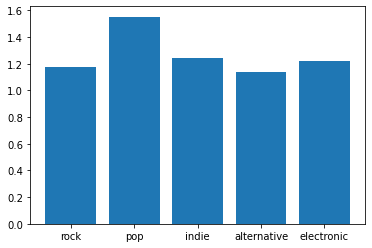

In [24]:
plt.bar(x=listeningsWithTags['tag'].unique(), height=intensities)